# Introduction to Machine Learning and BDTs

Author: [Savannah Thais](https://github.com/savvy379)

## Introduction
This notebook introduces common python libraries that are useful for ML ([Numpy](https://numpy.org/), [Pandas](https://pandas.pydata.org/), and [Matplotlib](https://matplotlib.org/)) and two 'simple' ML models: linear regression (applied to car fuel efficiency prediction) and boosted decision trees (applied to LHC event classification). Although the rest of the CODAS-HEP ML notebooks will use Pytorch Geoemtric, PyG isn't really designed for these types of models. Here we will use Keras to build our linear regression model (Keras uses a similar syntax to Pytorch (as we'll discuss) so it will be a nice intro) and we will use Scikitlearn to build our BDT model.

## Part 1: Python Libraries

### Numpy
A python library for handling arrays (matrices). Exercises adopted from this [lecture](https://compphysics.github.io/MachineLearningMSU/doc/pub/Introduction/html/Introduction.html).

In [8]:
#start by importing
import numpy as np

Let's initialize an array (vector) of 10 elements.  
These elements are deterimined by random numbers drawn from a normal distribution

In [2]:
n=10
x=np.random.normal(size=n)
print(x)

[-0.12311875  0.16538093  0.51545134  0.22336449 -0.81831725 -0.34240447
  0.25000097 -0.09326508  0.15597788  0.66882325]


You can also initialize an array with specific values

In [3]:
import numpy as np
x = np.array([1, 2, 3])
print(x)

[1 2 3]


Note that Python starts numbering elements from 0!

In [4]:
#get the first element of x
print(x[0])

1


In [5]:
#get the last element of x
print(x[-1])

3


You can also apply functions like log to an entire array

In [6]:
x=np.log(np.array([4, 7, 8]))
print(x)

[1.38629436 1.94591015 2.07944154]


*Note:* It's typically better to use the built in numpy functions because they're highly vectorized!

**Exercise:**
Write a NumPy program to convert the values of Centigrade degrees into Fahrenheit degrees. Centigrade values are stored into a NumPy array.
Sample Array [0, 12, 45.21 ,34, 99.91].

Hint: C/5=(F-32)/9

In [7]:
### your solution here
fvalues = [0, 12, 45.21, 34, 99.91]
F = np.array(fvalues)

We can also make matrices in numpy (and tensors of higher dimension)

In [8]:
A = np.log(np.array([ [4.0, 7.0, 8.0], [3.0, 10.0, 11.0], [4.0, 5.0, 7.0] ]))
print(A)

[[1.38629436 1.94591015 2.07944154]
 [1.09861229 2.30258509 2.39789527]
 [1.38629436 1.60943791 1.94591015]]


You can get information about the matrix and easily slice it (i.e. select specific values)

In [10]:
# get the matrix size
print("A size:", A.shape)
# make a new matrix B=log(A)
B = np.log(np.array([ [4.0, 7.0, 8.0], [3.0, 10.0, 11.0], [4.0, 5.0, 7.0] ]))
# print the first column, row-major order and elements start with 0
print("first column of B:", B[:,0]) 

A size: (3, 3)
first column of B: [1.38629436 1.09861229 1.38629436]


 There are also functions to create matrices with certain values (0 or 1) or random values

In [11]:
# define a matrix of dimension 10 x 10 and set all elements to zero
A = np.zeros( (n, n) )
print("A:",A)
# define a matrix of dimension 10 x 10 and set all elements to one
B = np.ones( (n, n) )
print("B",B)
# define a matrix of dimension 10 x 10 and set all elements to random numbers with x \in [0, 1]
C = np.random.rand(n, n)
print("C",C) 

A: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
B [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
C [[0.27746678 0.70221273 0.17907066 0.47137121 0.55312154 0.49300628
  0.07651875 0.97634799 0.83107524 0.9232568 ]
 [0.51320432 0.93635766 0.92095029 0.05984882 0.86059048 0.33489079
  0.48676361 0.74607562 0.46690851 0.55960344]
 [0.1797159  0.09894301 0.55663579 0.99686872 0.688683   0.82064111
  0.17937358 0.61024732 0.4644042

**Exercise:**
Define two 2x2 matrices, one randomly initialized and one defined, and multiply them. Is the answer what you expect?

Hint: check the documentation for multiply and dot

In [12]:
### your solultion here

There is MUCH more functionality in numpy, but it can be easiest to learn by looking at the documentation as you try exercises. Additional Numpy exercises can be found [here](https://www.w3resource.com/python-exercises/numpy/index.php)!

### Pandas
A python library for data structures and analysis tools. Exercises adopted from this [lecture](https://compphysics.github.io/MachineLearningMSU/doc/pub/Introduction/html/Introduction.html). For full documentation see [Pandas website](https://pandas.pydata.org/).

In [74]:
## start with importing
import pandas as pd

Pandas let's us make Dataframes (tensors) and Series (vectors). Let's initialize a matrix of LoTR characters:

In [14]:
data = {'First Name': ["Frodo", "Bilbo", "Aragorn II", "Samwise"],
        'Last Name': ["Baggins", "Baggins","Elessar","Gamgee"],
        'Place of birth': ["Shire", "Shire", "Eriador", "Shire"],
        'Date of Birth T.A.': [2968, 2890, 2931, 2980]
        }
data_pandas = pd.DataFrame(data)
data_pandas

,First Name,Last Name,Place of birth,Date of Birth T.A.
0,Frodo,Baggins,Shire,2968
1,Bilbo,Baggins,Shire,2890
2,Aragorn II,Elessar,Eriador,2931
3,Samwise,Gamgee,Shire,2980


You can easily change the Dataframe to be indexed by a different value, let's change it to character first name

In [15]:
data_pandas_name = pd.DataFrame(data,index=['Frodo','Bilbo','Aragorn','Sam'])
data_pandas_name

,First Name,Last Name,Place of birth,Date of Birth T.A.
Frodo,Frodo,Baggins,Shire,2968
Bilbo,Bilbo,Baggins,Shire,2890
Aragorn,Aragorn II,Elessar,Eriador,2931
Sam,Samwise,Gamgee,Shire,2980


And you can find info about a specific index value (row). Let's get info about Aragorn.

In [19]:
## by index (name)
data_pandas_name.loc['Aragorn']

First Name            Aragorn II
Last Name                Elessar
Place of birth           Eriador
Date of Birth T.A.          2931
Name: Aragorn, dtype: object

In [20]:
## by row number
data_pandas_name.iloc[2]

First Name            Aragorn II
Last Name                Elessar
Place of birth           Eriador
Date of Birth T.A.          2931
Name: Aragorn, dtype: object

You can also create data frames of purely numerical data (here our index could be samples and the columns could be different variables)

In [22]:
np.random.seed(100)
# setting up a 10 x 5 matrix
rows = 10
cols = 5
a = np.random.randn(rows,cols)
df = pd.DataFrame(a)
df.columns = ['var_a', 'var_b', 'var_c', 'var_d', 'var_e']
df.index = np.arange(10)
df

,var_a,var_b,var_c,var_d,var_e
0,-1.749765,0.342680,1.153036,-0.252436,0.981321
1,0.514219,0.221180,-1.070043,-0.189496,0.255001
2,-0.458027,0.435163,-0.583595,0.816847,0.672721
3,-0.104411,-0.531280,1.029733,-0.438136,-1.118318
4,1.618982,1.541605,-0.251879,-0.842436,0.184519
5,0.937082,0.731000,1.361556,-0.326238,0.055676
6,0.222400,-1.443217,-0.756352,0.816454,0.750445
7,-0.455947,1.189622,-1.690617,-1.356399,-1.232435
8,-0.544439,-0.668172,0.007315,-0.612939,1.299748
9,-1.733096,-0.983310,0.357508,-1.613579,1.470714


And get basic info about the dataframe

In [23]:
df.describe()

,var_a,var_b,var_c,var_d,var_e
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-0.175300,0.083527,-0.044334,-0.399836,0.331939
std,1.069584,0.965548,1.018232,0.793167,0.918992
min,-1.749765,-1.443217,-1.690617,-1.613579,-1.232435
25%,-0.522836,-0.633949,-0.713163,-0.785061,0.087887
50%,-0.280179,0.281930,-0.122282,-0.382187,0.463861
75%,0.441264,0.657041,0.861676,-0.205231,0.923602
max,1.618982,1.541605,1.361556,0.816847,1.470714


In [24]:
print("mean:", df.mean())
print("standard deviation:", df.std())

mean: var_a   -0.175300
var_b    0.083527
var_c   -0.044334
var_d   -0.399836
var_e    0.331939
dtype: float64
standard deviation: var_a    1.069584
var_b    0.965548
var_c    1.018232
var_d    0.793167
var_e    0.918992
dtype: float64


**Exercise:** Select the second column of our dataframe and display the mean. Select the last column of our dataframe and describe it.

In [25]:
#your solution here

Pandas is an extremely powerful library for reading (as we'll see in our linear regression model) and manipulating all kinds of data.   
Additional Pandas exercises can be found [here](https://www.w3resource.com/pandas/index.php)!

### Matplotlib
[Matplotlib](https://matplotlib.org/) is a library for easily creating and customizing plots in Python. There are other similar/useful libraries like [seaborn](https://seaborn.pydata.org/) and [plotly](https://plotly.com/).

In [12]:
## start by importing
import matplotlib.pyplot as plt

You can easily create plots directly from numpy arrays

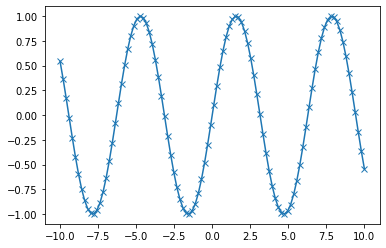

In [13]:
%matplotlib inline
#generate data points of the sine function
x = np.linspace(-10,10,100)
y = np.sin(x)
## plot it 
plt.plot(x,y,marker='x')
plt.show()

You can also easily create plots from pandas dataframes. In fact, there is a pandas wrapper for matplotlib that let's you call plotting directly from the dataframe

In [28]:
#create a randomized data frame
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2

,a,b,c,d
0,0.363188,0.204345,0.276765,0.246536
1,0.173608,0.966610,0.957013,0.597974
2,0.731301,0.340385,0.092056,0.463498
3,0.508699,0.088460,0.528035,0.992158
4,0.395036,0.335596,0.805451,0.754349
5,0.313066,0.634037,0.540405,0.296794
6,0.110788,0.312640,0.456979,0.658940
7,0.254258,0.641101,0.200124,0.657625
8,0.778289,0.779598,0.610328,0.309000
9,0.697735,0.859618,0.625324,0.982408


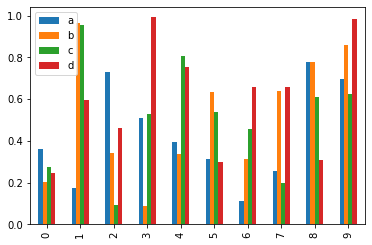

In [29]:
#plot it as a bar graph
df2.plot(kind='bar')

**Exercise:** create a green histogram of the third column of our dataframe df2

In [30]:
# your solution here

Matplot offers MANY different kinds of plots. Additional exercises can be found [here](https://www.w3resource.com/graphics/matplotlib/)

## Part 2: Keras and Linear Regression

### Introduction 
[Keras](https://keras.io/) is an intuitive machine learning API built on top of the TensorFlow library. In this exercise we will build a linear regression model using the [Auto MPG] Dataset. This exercise is adopted from the [Keras Tutorial](https://www.tensorflow.org/tutorials/keras/regression).

In [31]:
#import keras and seaborn (for plotting)
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
print(tf.__version__)

2.8.2


The Auto MPG Dataset is taken from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/) and has the data to build a model to predict fuel efficiency of late 1970s and early 1980s automobiles. It includes information like cylinders, displacement, horsepower, and weight. 

Let's read it in as a pandas dataframe

In [32]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [33]:
#make a copy for manipulation
dataset = raw_dataset.copy()
# print the last values of the dataframe
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


### EDA

It's always important to clean the data before building a model. Let's check if there are any missing values in our dataframe

In [34]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

There are 6 NaN values in the horsepower column. Because we have ~400 values, we can just drop these rows to keep this exercise simple (note, this is often not best practice for dealing with missing data). 

In [35]:
#drop rows with nan values
dataset = dataset.dropna()

The origin column actually describes the country of origin of the automobile with the following mapping: 1=USA, 2=Europe, 3=Japan. Let's turn this into a one-hot encoded column so we can use it in our model. 

In [36]:
#define the mapping and replace the origin values
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
#use get_dummies (another great pandas function) to create one-hot columns
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
#get the first rows of df
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


**Question:** before building our model what else should we do to our dataset?

In [37]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

Let's take a quick look at the joint distrubtion of some column pairs from the dataset

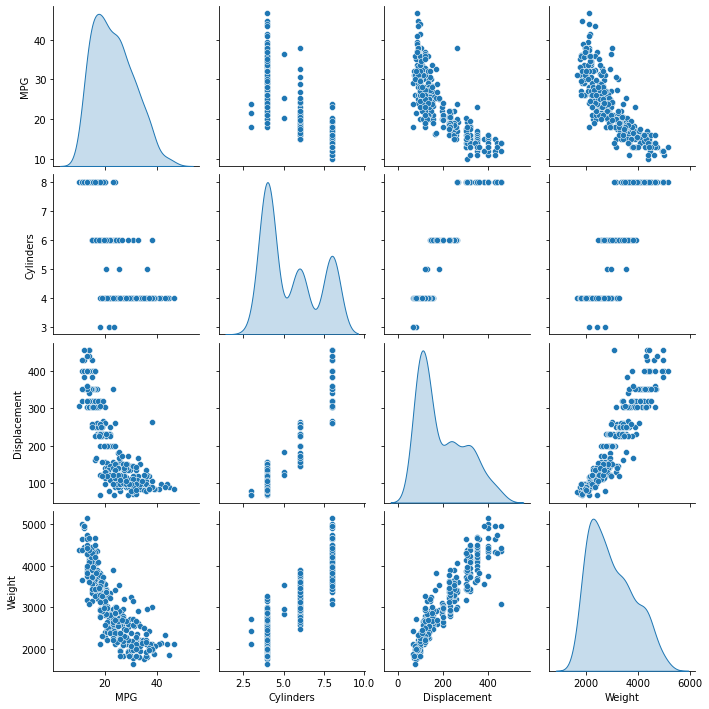

In [38]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

We can also use `describe` to get more info about the columns

In [40]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.178344,0.197452,0.624204
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.383413,0.398712,0.485101
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


**Question:** what kinds of patterns do you see here that you expect will be relevant to the model?

Because we're building a supervised model to predict the MPG of each car, we need to create a separate vector of the training and test labels



In [41]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

### Model Building 
It's often important to normalize the variables before building a model so that one variable doesn't wash out the information from others. 

In [42]:
# get the mean and std of each column
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


Keras has a built in functionality to build normalization preprocessing into your model

In [43]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
#create the normalization layer
normalizer = preprocessing.Normalization()
# get the specific values for our data
normalizer.adapt(np.array(train_features))
# we can look at these values and compare them to what we saw above
print(normalizer.mean.numpy())

[[5.47770691e+00 1.95318497e+02 1.04869446e+02 2.99025171e+03
  1.55592356e+01 7.58980942e+01 1.78343967e-01 1.97452217e-01
  6.24203861e-01]]


Let's start with a simple single-variable regression to predict MPG from only Horsepower. First, we have to define the model architecture. We'll set up our linear regression model as a single layer neural network with no activation function (more on this soon) which is equivalent to matrix multiplication plus a bias term. 

In [57]:
## get just the horsepower
horsepower = np.array(train_features['Horsepower'])

## define normalizer 
horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [58]:
# build the sequential layer (using a standard dense layer (matrix multiplication) of order 1)
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


We can check that the model gives us the expected dimensionality (though the values will be terrible since we haven't trained yet)

In [59]:
# run model on first 10 rows
horsepower_model.predict(horsepower[:10])

array([[-0.07124052],
       [-0.0402347 ],
       [ 0.13148987],
       [-0.09986129],
       [-0.09032103],
       [-0.03546457],
       [-0.10701647],
       [-0.09032103],
       [-0.02353925],
       [-0.0402347 ]], dtype=float32)

Now we train the model using the `Model.compile()` method. We must specify the loss (we'll use mean absolute error) and the optimizer (we'll use Adam, a type of gradient descent algorithm that we'll learn more about in the NN lectue).

In [60]:
#configure training 
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [61]:
%%time
#run the training! 
history = horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 3.44 s, sys: 149 ms, total: 3.59 s
Wall time: 5.43 s


We can look at the model's training process using the stats stored in the `history` object

In [49]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,4.469564,4.112854,95
96,4.244111,4.346601,96
97,4.669395,4.244362,97
98,4.020863,4.827736,98
99,4.128093,4.623786,99


In [50]:
#plot the training history
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

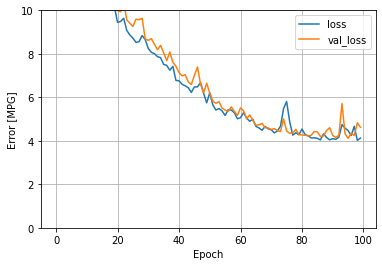

In [51]:
plot_loss(history)

In [64]:
# check performance on test set

score = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)
print(score)

3.6571202278137207


Since we're only using one variable it's easy to visualize the results of our model

In [67]:
## create set of data points to plot our model function
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

In [66]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

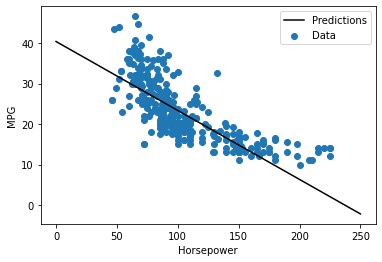

In [68]:
plot_horsepower(x, y)

**Exercise:** build a multiple feature linear regression model and compare the performance to our single feature model.

In [51]:
## your solution here

## Part Three: ScikitLearn and BDTs

### Introduction 
Now we'll turn to a physics example: identifying Higgs Bosons with LHC data. This is a **classification problem** so we'll need to use an algorithm that is suited for classification, like BDTs! 

For this part of the tutorial we'll use the Higgs open dataset, again from [UCI](https://archive.ics.uci.edu/ml/datasets/HIGGS). The data has been produced using Monte Carlo simulations. The first 21 features (columns 2-22) are kinematic properties measured by the particle detectors in the accelerator. The last seven features are functions of the first 21 features; these are high-level features derived by physicists to help discriminate between the two classes

In [57]:
## get the data
from sklearn.datasets import fetch_openml

data = fetch_openml('Higgs')
X, y = data['data'], data['target']

/usr/local/lib/python3.7/dist-packages/sklearn/datasets/_openml.py:421: UserWarning: Multiple active versions of the dataset matching the name higgs exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]["version"])


### EDA
Let's take a look at what information is included in our dataset

In [37]:
X.head()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b-tag,jet2pt,...,jet4eta,jet4phi,jet4b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.423265,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,0.755421,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


We have information about the leading lepton ($p_T$, eta, phi), the missing energy (magnitude and phi), the four leading jets ($p_T$, eta, phi, btag), and derived mass features.

In [38]:
X.describe()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b-tag,jet2pt,...,jet4eta,jet4phi,jet4b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,98050.000000,98050.000000,98050.000000,98050.000000,98050.000000,98050.000000,98050.000000,98050.000000,98050.000000,98050.000000,...,98050.000000,98049.000000,98049.000000,98049.000000,98049.000000,98049.000000,98049.000000,98049.000000,98049.000000,98049.000000
mean,0.990320,-0.003950,-0.001020,0.995372,-0.007896,0.987063,-0.003187,-0.000158,0.998518,0.991169,...,-0.006821,-0.004252,0.992748,1.032689,1.023186,1.050129,1.010358,0.973207,1.032052,0.959432
std,0.561794,1.004883,1.006116,0.595354,1.006835,0.473269,1.008452,1.008649,1.027326,0.498078,...,1.008880,1.007205,1.396809,0.653127,0.372136,0.164565,0.398042,0.522968,0.363590,0.313487
min,0.274697,-2.434976,-1.742508,0.001283,-1.743944,0.139976,-2.968735,-1.741237,0.000000,0.188981,...,-2.497265,-1.742691,0.000000,0.110875,0.303144,0.133012,0.295983,0.048125,0.303350,0.350939
25%,0.590936,-0.741001,-0.867492,0.575680,-0.881763,0.676336,-0.689225,-0.868096,0.000000,0.656964,...,-0.724184,-0.877583,0.000000,0.791368,0.846572,0.985771,0.767491,0.674055,0.819441,0.770026
50%,0.854835,-0.002976,0.002081,0.890839,-0.011589,0.892163,-0.001016,-0.004931,1.086538,0.889256,...,-0.009622,-0.010253,0.000000,0.895673,0.950702,0.989737,0.917320,0.874083,0.947187,0.871170
75%,1.236547,0.734318,0.868220,1.291567,0.865098,1.167534,0.683233,0.871085,2.173076,1.199357,...,0.711603,0.869386,3.101961,1.026068,1.083365,1.020822,1.141703,1.140051,1.139135,1.057654
max,7.805887,2.433894,1.743236,7.998711,1.743229,7.064657,2.969674,1.741454,2.173076,8.280169,...,2.498009,1.743372,3.101961,18.428827,10.038273,4.565248,7.442589,11.994177,7.318191,6.015647


Let's check for missing values

In [71]:
X.isna().sum()

lepton_pT                   0
lepton_eta                  0
lepton_phi                  0
missing_energy_magnitude    0
missing_energy_phi          0
jet1pt                      0
jet1eta                     0
jet1phi                     0
jet1b-tag                   0
jet2pt                      0
jet2eta                     0
jet2phi                     0
jet2b-tag                   0
jet3pt                      0
jet3eta                     0
jet3phi                     0
jet3b-tag                   0
jet4pt                      0
jet4eta                     0
jet4phi                     1
jet4b-tag                   1
m_jj                        1
m_jjj                       1
m_lv                        1
m_jlv                       1
m_bb                        1
m_wbb                       1
m_wwbb                      1
dtype: int64

Again there's only a few so we can just drop them

In [78]:
y=y[pd.notnull(X['jet4phi'])]
y=y[pd.notnull(X['jet4b-tag'])]
y=y[pd.notnull(X['m_jj'])]
y=y[pd.notnull(X['m_jjj'])]
y=y[pd.notnull(X['m_lv'])]
y=y[pd.notnull(X['m_jlv'])]
y=y[pd.notnull(X['m_bb'])]
y=y[pd.notnull(X['m_wbb'])]
y=y[pd.notnull(X['m_wwbb'])]

In [80]:
X = X.dropna()

Let's plot our variables to see what might be useful in distinguishing between signal events (Higgs) and background

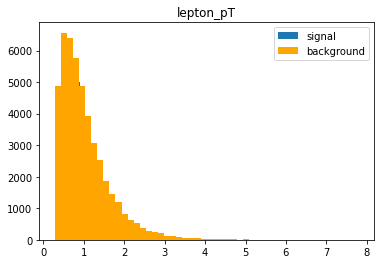

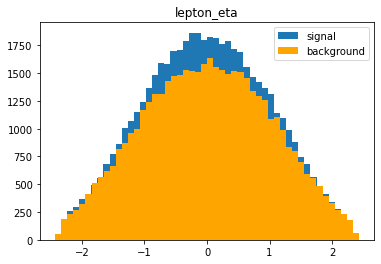

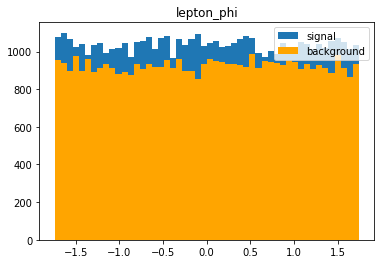

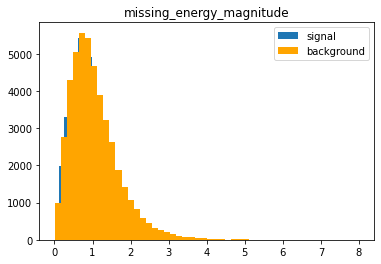

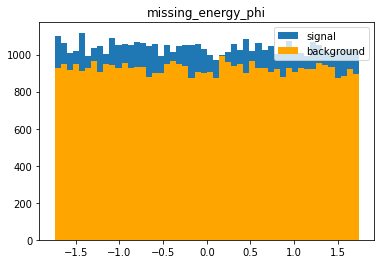

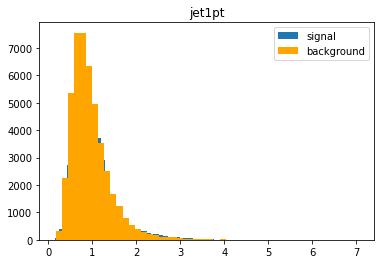

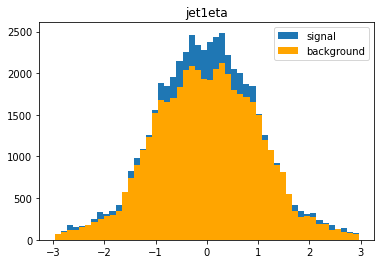

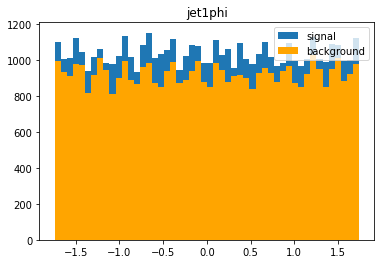

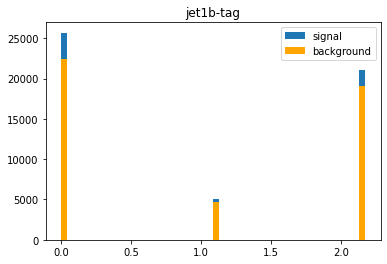

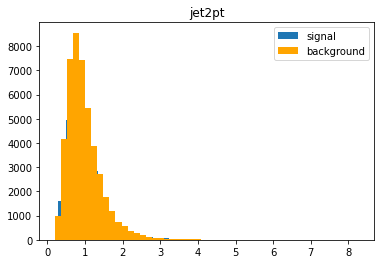

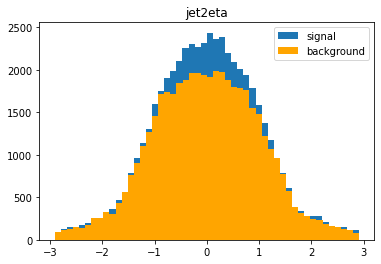

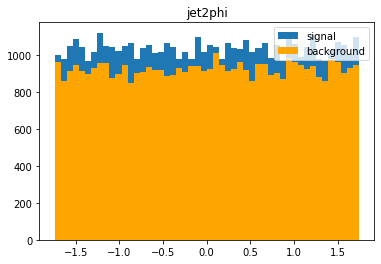

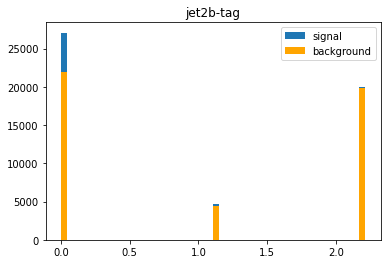

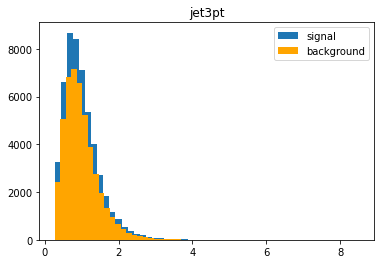

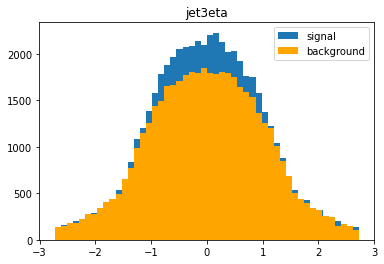

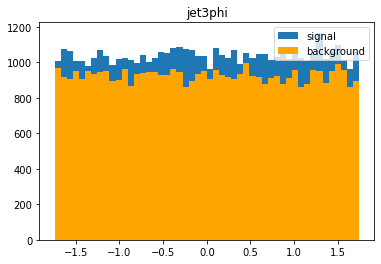

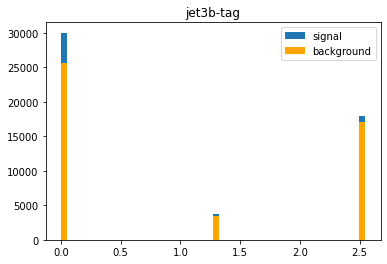

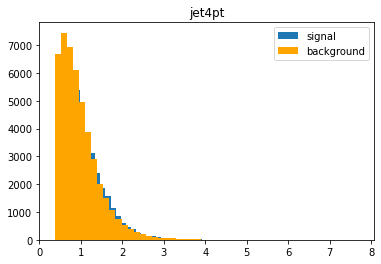

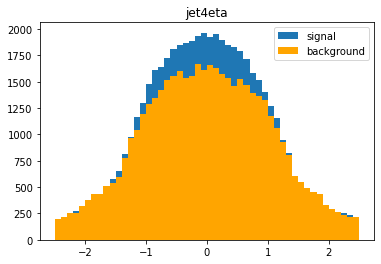

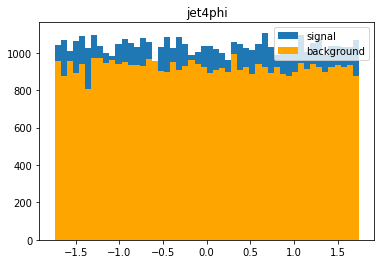

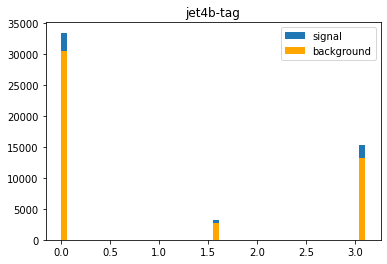

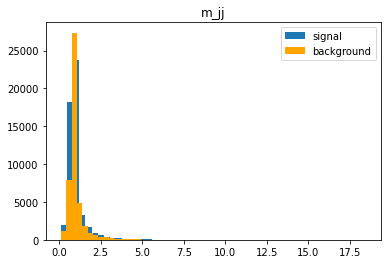

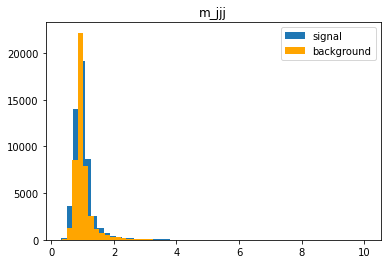

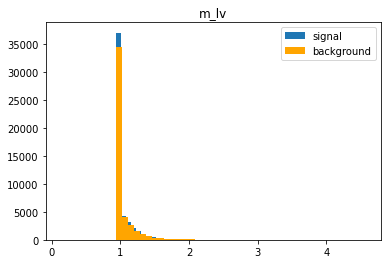

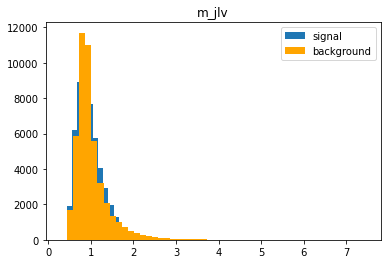

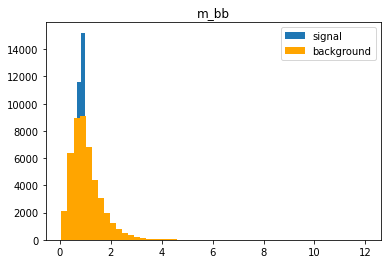

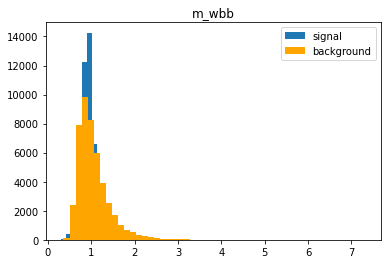

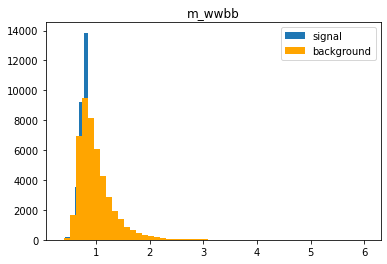

In [50]:
# Loop over the features and plot a histogram, signal 
for i in range(len(data['feature_names'])):
    plt.hist(X[y==1].iloc[:,i], bins=50, label='signal')
    plt.hist(X[y==0].iloc[:,i], bins=50, color='orange', label='background')
    plt.title(data['feature_names'][i])
    plt.legend(loc='upper right')
    plt.show()

**Question:** what patterns do you notice? What variables might be useful for our classification problem? 

In general, there's a lot of overlap between our classes. This why decision trees, and particularly forests of decision trees, can be helpful! Decision allow us to combine multiple cuts on multiple variables and boosted decision trees (BDTs) allow us to combine the classification power of multiple trees (which may be relatively weak classifiers individually).

### Model Building
First, we'll build a single decision tree just to get an idea of the performance (plus we can easily visualize it).

First we need to normalize and split the data. We'll also select just a few promising looking featues to start with.

In [83]:
## select a few columns
feature_cols = ['lepton_eta','m_wbb','m_jjj','jet1eta','missing_energy_magnitude']
X_reduced = X[feature_cols]

In [84]:
## split our data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=1)

In [85]:
## scale our features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Now we'll build our single decision tree!

In [116]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Now we can check the accuracy of our single tree

In [117]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",clf.score(X_test, y_test))

Accuracy: 0.6058133605303416


Oof...not too good. Just barely better than a coin flip. Hopefully our BDT model will do better than this single tree. Before we build it though, let's take a look at our decision tree. 

In [94]:
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
from io import StringIO

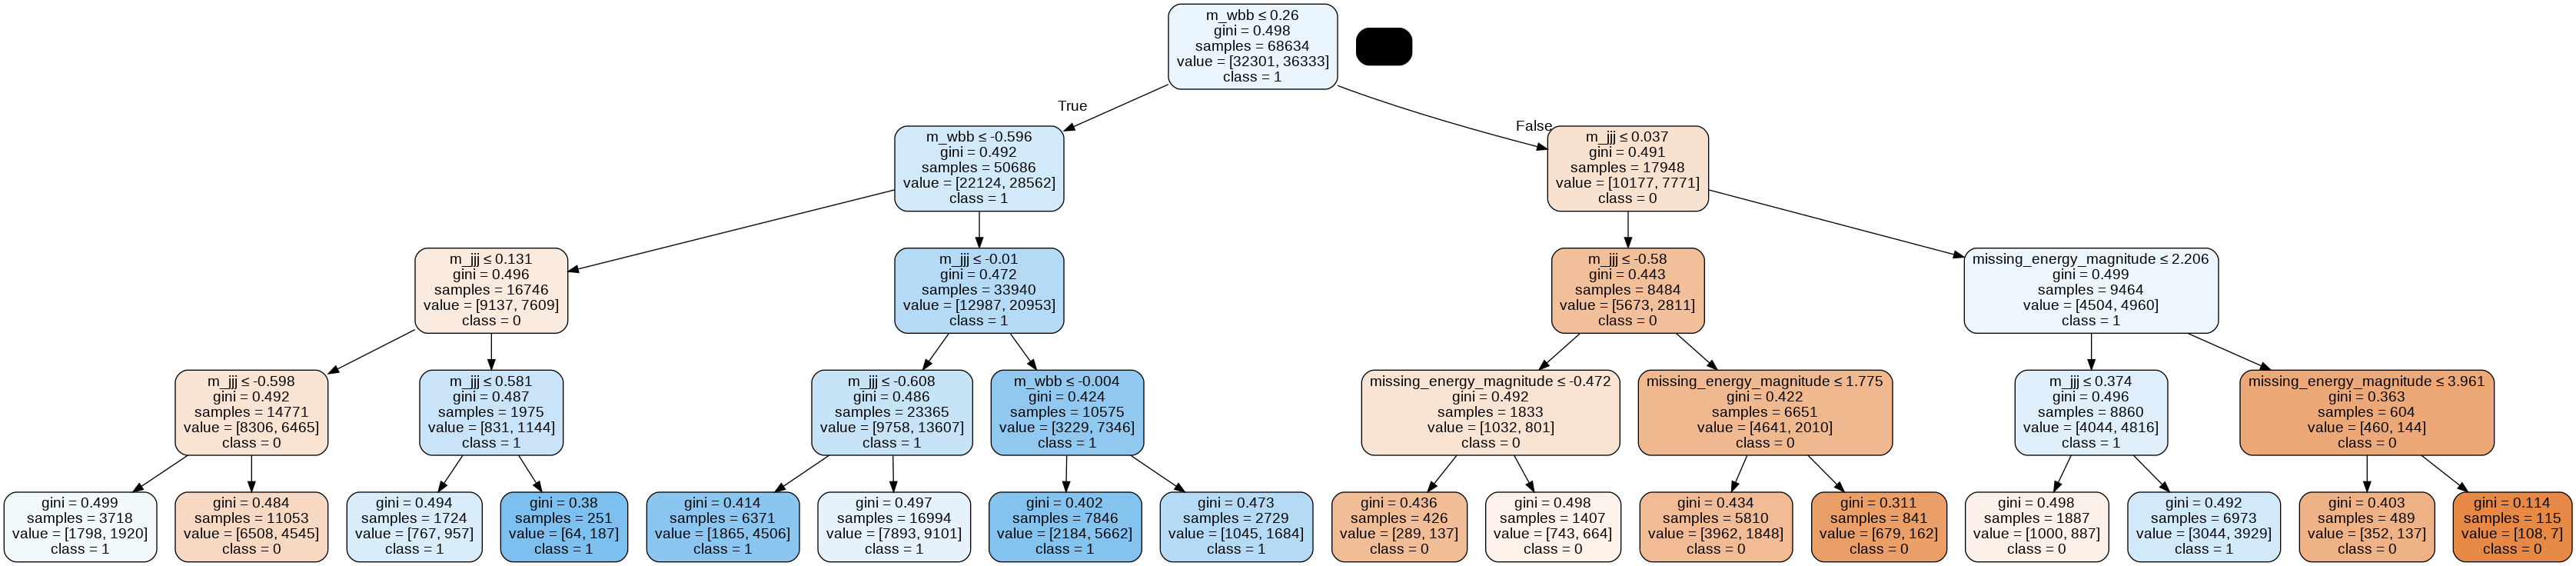

In [102]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

You'll see that each 'leaf' on our tree shows the Gini index. For a split on attribute A partitioning our data D into two subsets D1 and D2, the Gini index is $\textrm{Gini}_A(D)=\frac{|D1|}{D}\textrm{Gini(D1)}+\frac{|D2|}{D}\textrm{Gini(D2)}$ where $\textrm{Gini(D)}=1-\sum_{i=1}^mP_i^2$ and $P_i^2$ is the probability of a data point in $\textrm{D}$ belonging to class $\textrm{C}_i$. The Decision Tree splits by finding the the split across all attributes with the minimum Gini index. The colors of the leaves are based on their purity (and blue for signal, orange for background).

We can also look at the predicted classes of our test data set. This plot isn't as interesting for a single decision tree, but it will be for our BDT.

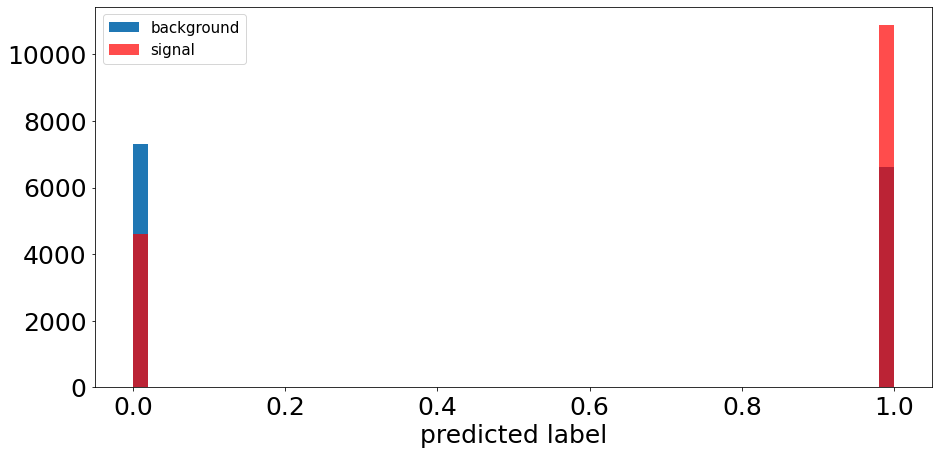

In [136]:
plt.figure(figsize=(15,7))
plt.hist(y_pred[y_test==0], bins=50, label='background')
plt.hist(y_pred[y_test==1], bins=50, label='signal', alpha=0.7, color='r')
plt.xlabel('predicted label', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

We can see that our true positives and true negative rates are higher than our false positives and fale negatives (good!) but we still have a lot of errors).

Ok, now let's build our BDT! For now we'll use the same reduced feature set we used for our single decision tree. 

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=2, random_state=0).fit(X_train, y_train)
print("Accuracy:",clf2.score(X_test, y_test))

Accuracy: 0.6182899881013089


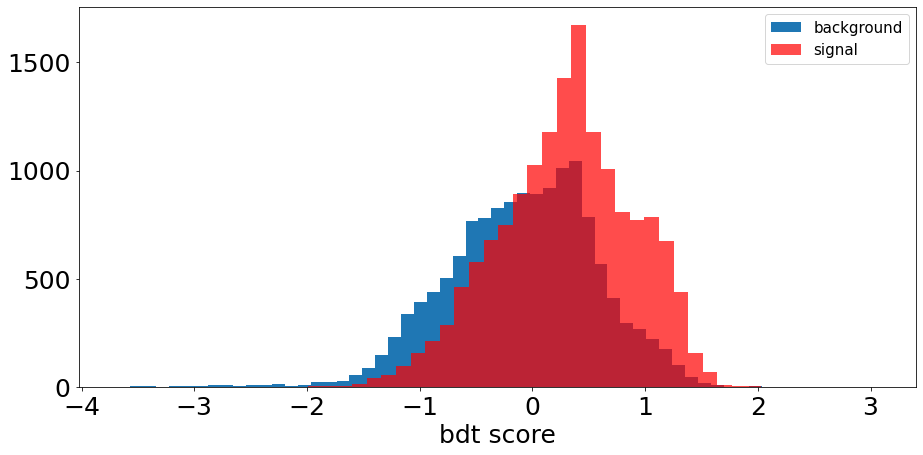

In [135]:
twoclass_output = clf2.decision_function(X_test)
plt.figure(figsize=(15,7))
plt.hist(twoclass_output[y_test==0], bins=50, label='background')
plt.hist(twoclass_output[y_test==1], bins=50, label='signal', alpha=0.7, color='r')
plt.xlabel('bdt score', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

We can also plot the 'ROC' for our trained decision tree to see what classification power we would get for different cut values on the bdt score.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


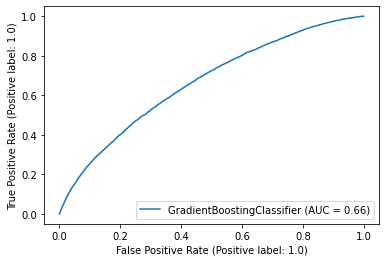

In [137]:
from sklearn import metrics
metrics.plot_roc_curve(clf2, X_test, y_test)
plt.show() 

Even using 100 trees we didn't beat our single tree prediction score by much. We can also see that the bdt scores for our signal and background overlap quite a lot so whatever cut we select on the output score will not give us much classification power. Unfortunately, this is one of the challenges of ML: the values of the model hyperparameters (the non-learnable parameters) can have a big impact on mode performance, and it's hard to say which values will work best for a particular problem. That brings us to our final exercise...

**Exercise:** try to improve the BDT by adjusting the model hyperparameters (learning rate, max depth, n estimators are what we're currently setting but you can find more hyperparameters [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)) and the features used in the model. Let's see who can create the most accurate classifier! 

*Hint: if you change the features used in the model you will need to rerun the test-train split and feature normalization.*

In [ ]:
## your code here

## Wrap Up

You're well on your way to becoming an ML expert! You're now familair with important libraries for manipulating and visualizing data and how to build a few different types of models. 

Feel free to use this code to try building models for other datasets. Kaggle, sklearn, and openml have tons of available datasets (and I'm sure you have your own from your own research!). Trial and error is one of the best ways to learn and build your ML intuition. 